In [17]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,QuantileTransformer

In [23]:
df=pd.read_csv('drawndata2.csv')
X=df[['x','y']].values
y=df['z']=='a'
df

,x,y,z
0,469.759355,453.574946,a
1,535.331819,435.221848,a
2,504.285526,437.767578,a
3,469.891398,368.371652,a
4,405.425622,403.141546,a
...,...,...,...
212,600.143988,80.491534,b
213,568.999685,83.044558,b
214,618.746701,76.644596,b
215,623.827439,33.224234,b


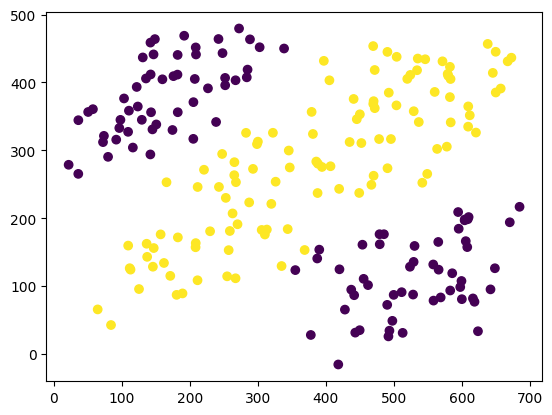

In [22]:
plt.scatter(X[:,0],X[:,1],c=y)

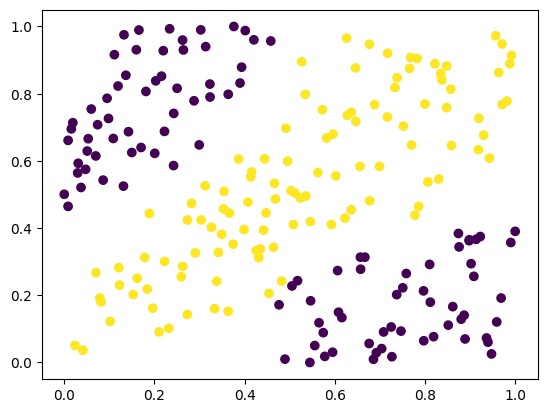

In [24]:
X_new=QuantileTransformer(n_quantiles=100).fit_transform(X)
plt.scatter(X_new[:,0],X_new[:,1],c=y)

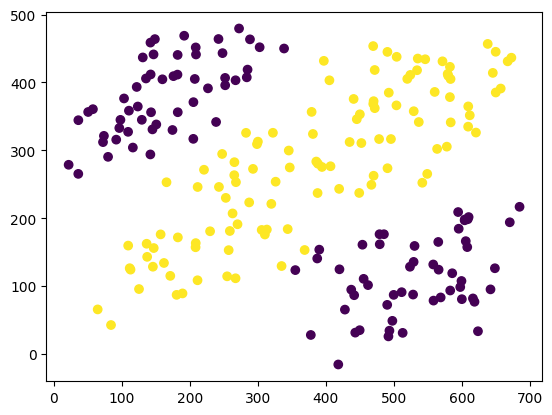

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

pipe=Pipeline([
    ('scaler',PolynomialFeatures()),
    ('model',LogisticRegression())
])
pred=pipe.fit(X,y).predict(X)
plt.scatter(X[:,0],X[:,1],c=pred)

In [37]:
from sklearn.preprocessing import OneHotEncoder

arr=np.array(['low','low','high','medium']).reshape(-1,1)

enc=OneHotEncoder(sparse_output=False,handle_unknown='ignore')
enc.fit_transform(arr)

array([[0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [40]:
enc.transform([['zero']])

array([[0., 0., 0.]])